<a href="https://colab.research.google.com/github/0902338471/Coder_School_Assigment/blob/master/Copy_of_Week04_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [0]:
#import necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd

In [0]:
#read the csv
ted=pd.read_csv("/content/sample_data/ted.csv")


**Checking some information of the data**

In [25]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [26]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


**It is easy to see that the data has no NaN values from the above data info**

**Let do some quick research on the data**

**There are some columns that are ambiguous and we need to make it clear enough to understand our data.So let get's through the meaning of 3 columns even ,film_date and published_date**

In [27]:
#get the unique value of the event column
event=ted['event'].unique()
print(event)

['TED2006' 'TED2004' 'TED2005' 'TEDGlobal 2005' 'TEDSalon 2006' 'TED2003'
 'TED2007' 'TED2002' 'TEDGlobal 2007' 'TEDSalon 2007 Hot Science'
 'Skoll World Forum 2007' 'TED2008' 'TED1984' 'TED1990' 'DLD 2007'
 'EG 2007' 'TED1998' 'LIFT 2007' 'TED Prize Wish'
 'TEDSalon 2009 Compassion' 'Chautauqua Institution' 'Serious Play 2008'
 'Taste3 2008' 'TED2001' 'TED in the Field' 'TED2009' 'EG 2008'
 'Elizabeth G. Anderson School' 'TEDxUSC' 'TED@State' 'TEDGlobal 2009'
 'TEDxKC' 'TEDIndia 2009' 'TEDSalon London 2009'
 'Justice with Michael Sandel' 'Business Innovation Factory' 'TEDxTC'
 'Carnegie Mellon University' 'Stanford University' 'AORN Congress'
 'University of California' 'TEDMED 2009' 'Royal Institution'
 'Bowery Poetry Club' 'TEDxSMU' 'Harvard University' 'TEDxBoston 2009'
 'TEDxBerlin' 'TED2010' 'TEDxAmsterdam' 'World Science Festival' 'BBC TV'
 'Arbejdsglaede Live' 'Web 2.0 Expo 2008' 'TEDxNASA'
 'Michael Howard Studios' 'DICE Summit 2010'
 "Eric Whitacre's Virtual Choir" 'Mission B

**It seems like the event column actually is just the event the talks were represented at** 

In [28]:
#get the film_date column
film_date=ted['film_date'].unique()
print(film_date)


[1140825600 1140739200 1140912000 1140566400 1138838400 1140652800
 1139184000 1077753600 1109289600 1121299200 1077580800 1075852800
 1120694400 1077840000 1075680000 1121385600 1109376000 1121212800
 1120176000 1121126400 1109203200 1108598400 1109116800 1164844800
 1107302400 1044230400 1173312000 1014940800 1046304000 1012608000
 1044144000 1166054400 1077667200 1141344000 1172880000 1164931200
 1181001600 1181174400 1180915200 1181088000 1181260800 1173398400
 1173139200  981072000 1189296000 1167609600 1173225600 1014854400
 1015113600 1204070400 1204156800  444528000  636422400 1204243200
 1141084800 1204502400 1201910400 1197417600 1078272000 1046649600
 1170374400 1202774400  886377600 1196553600 1196640000  888624000
 1204329600 1172707200 1046390400 1222992000 1078012800 1254355200
 1255478400 1109548800 1210118400 1210204800 1216339200 1078099200
 1216425600 1228348800 1215388800 1209945600 1216252800 1214784000
 1233532800 1233792000 1233878400 1233964800 1233705600 122904

In [29]:
#and the published_date column
published_date=ted['published_date'].unique()
print(published_date)

[1151367060 1151440680 1152490260 ... 1506006095 1506024042 1506092422]


**It seems like the format of these two date column is in some hashed format and we can not get access to that specific date.Therefore,we will not go through these columns in details but go through other remaining valuable columns**

**Let see top 10 speakers that have largest number of talks as main_speaker**

In [30]:
#count number of talks he/she has presented
ted_speaker_count=ted['main_speaker'].value_counts()
print(ted_speaker_count.head(10))

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Clay Shirky             5
Nicholas Negroponte     5
Bill Gates              5
Julian Treasure         5
Jacqueline Novogratz    5
Dan Ariely              5
Name: main_speaker, dtype: int64


**Wow there is one famous speaker with 5 talks that is familiar with all of us and he is Bill Gates,a billionaire!!.Let's get through all of his talks**

In [31]:
bill_gate_talk=ted[ted['main_speaker']=='Bill Gates']
bill_gate_talk

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
380,468,Bill Gates hopes to solve some of the world's ...,1216,TED2009,1233532800,35,Bill Gates,"Bill Gates: Mosquitos, malaria and education",1,1233800640,"[{'id': 24, 'name': 'Persuasive', 'count': 633...","[{'id': 499, 'hero': 'https://pe.tedcdn.com/im...",Philanthropist,"['TED Brain Trust', 'business', 'education', '...","Mosquitos, malaria and education",https://www.ted.com/talks/bill_gates_unplugged\n,2634359
618,948,"At TED2010, Bill Gates unveils his vision for ...",1669,TED2010,1265932800,38,Bill Gates,Bill Gates: Innovating to zero!,1,1266454800,"[{'id': 21, 'name': 'Unconvincing', 'count': 1...","[{'id': 51, 'hero': 'https://pe.tedcdn.com/ima...",Philanthropist,"['TED Brain Trust', 'business', 'energy', 'glo...",Innovating to zero!,https://www.ted.com/talks/bill_gates\n,4329332
882,231,America's school systems are funded by the 50 ...,616,TED2011,1299110400,35,Bill Gates,Bill Gates: How state budgets are breaking US ...,1,1299270660,"[{'id': 8, 'name': 'Informative', 'count': 690...","[{'id': 451, 'hero': 'https://pe.tedcdn.com/im...",Philanthropist,"['aging', 'education', 'money', 'youth']",How state budgets are breaking US schools,https://www.ted.com/talks/bill_gates_how_state...,1866264
1496,405,"Until recently, many teachers only got one wor...",624,TED Talks Education,1367884800,39,Bill Gates,Bill Gates: Teachers need real feedback,1,1368025280,"[{'id': 8, 'name': 'Informative', 'count': 326...","[{'id': 1728, 'hero': 'https://pe.tedcdn.com/i...",Philanthropist,"['TED Brain Trust', 'culture', 'education', 'g...",Teachers need real feedback,https://www.ted.com/talks/bill_gates_teachers_...,2206204
1950,171,"In 2014, the world avoided a global outbreak o...",512,TED2015,1426636800,37,Bill Gates,Bill Gates: The next outbreak? We’re not ready,1,1428073125,"[{'id': 8, 'name': 'Informative', 'count': 894...","[{'id': 2177, 'hero': 'https://pe.tedcdn.com/i...",Philanthropist,"['TED Brain Trust', 'disaster relief', 'diseas...",The next outbreak? We’re not ready,https://www.ted.com/talks/bill_gates_the_next_...,2239259


**Let's see top 10 talks which are viewed most**

In [32]:
#sort by views column and sort it in descending order
top_view_talk=ted.sort_values(by='views',ascending=False)
top_view_talk

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,1253145600,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,1272965460,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,1275782400,52,Brené Brown,Brené Brown: The power of vulnerability,1,1293115500,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,1233878400,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,1242781200,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,1370822400,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,1403879897,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,1449532800,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_t

**Are there some correlations between the number of language which the talks are available and the number of views?Let scatter plot to see it**

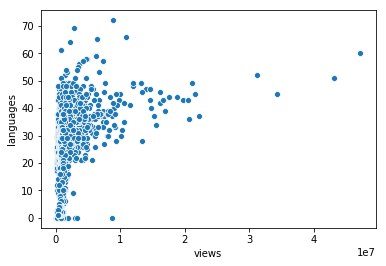

In [33]:
#scatter plot to explore the correlation between views and language attributes
sns.scatterplot(x="views", y="languages", data=ted)

**How about the length of the talk ? Does it affect number of views.Let's do the scatter plot**

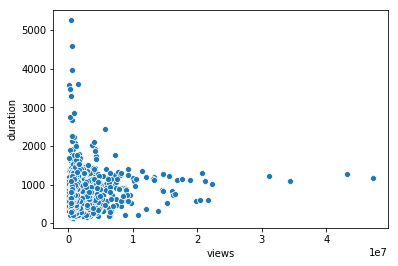

In [34]:
#scatter plot to explore the correlation between views and duration attributes
sns.scatterplot(x="views", y="duration", data=ted)

**According to the plot above,it seems like the number of languages available for that talk and the duration does not affect the number of views.Also,based on the second scatter plot it is also easy to get that the most popular duration of all the talks fall in the range from 0-2000 seconds(it means from 0-33 minutes)**

**Let's see what talks has the maximum number of speakers**

In [35]:
#sort the ted by num_speaker attribute in descending order
max_num_speaker_per_talk=ted.sort_values(by='num_speaker',ascending=False).head(1)
#get the index of that row
index=max_num_speaker_per_talk.index[0]
#print that row
print(ted.iloc[index])

comments                                                              6
description           Movement artists Jon Boogz and Lil Buck debut ...
duration                                                            575
event                                                           TED2017
film_date                                                    1492992000
languages                                                            12
main_speaker                                     Jon Boogz and Lil Buck
name                  Jon Boogz and Lil Buck: A dance to honor Mothe...
num_speaker                                                           5
published_date                                               1502448962
ratings               [{'id': 1, 'name': 'Beautiful', 'count': 84}, ...
related_talks         [{'id': 2589, 'hero': 'https://pe.tedcdn.com/i...
speaker_occupation                                      Movement artist
tags                  ['art', 'creativity', 'dance', 'performanc

**Let's view full text of the ratings column of this row**

In [36]:
print(ted.iloc[index]['ratings'])

[{'id': 1, 'name': 'Beautiful', 'count': 84}, {'id': 2, 'name': 'Confusing', 'count': 3}, {'id': 26, 'name': 'Obnoxious', 'count': 2}, {'id': 10, 'name': 'Inspiring', 'count': 23}, {'id': 22, 'name': 'Fascinating', 'count': 24}, {'id': 25, 'name': 'OK', 'count': 1}, {'id': 9, 'name': 'Ingenious', 'count': 11}, {'id': 23, 'name': 'Jaw-dropping', 'count': 18}, {'id': 24, 'name': 'Persuasive', 'count': 2}, {'id': 11, 'name': 'Longwinded', 'count': 1}, {'id': 7, 'name': 'Funny', 'count': 3}, {'id': 8, 'name': 'Informative', 'count': 1}, {'id': 3, 'name': 'Courageous', 'count': 1}, {'id': 21, 'name': 'Unconvincing', 'count': 0}]


**This column's format contains a list of dictionaries where each dictionary contains three key-value pairs(id , status , count times of that status).Let's explore this field a little bit**

**Let's list all of the unique status of ratings in all ted talks**

In [37]:
import ast
import json
#creating the list for storing all status
all_status=[]
#loop through all rows
for index, row in ted.iterrows():
    ratings=row['ratings']
    #ratings is currently a string for example:[{'id': 7, 'name': 'Funny', 'count': 19645}],we need to eliminate the [{}] symbol and just get the
    #string inside
    ratings=ratings[2:-2]
    #get the list of dictionaries by split the string 
    mylist=ratings.split('}, {')
    #loop through all dictionaries inside that rating column of one row
    for each in mylist:
      #handle that string to make it look like a dictionary first
      each='{'+each+'}'
      #convert that string to dictionary
      each1 = ast.literal_eval(each)
      #get the name of status and put it into the list
      name=each1['name']
      all_status.append(name)
print(all_status)

['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'Funny', 'Courageous', 'Confusing', 'Beautiful', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Ingenious', 'Persuasive', 'Jaw-dropping', 'Obnoxious', 'OK', 'Funny', 'Courageous', 'Ingenious', 'Beautiful', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Confusing', 'OK', 'Persuasive', 'Jaw-dropping', 'Obnoxious', 'Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping', 'Obnoxious', 'OK', 'Ingenious', 'Funny', 'Beautiful', 'Courageous', 'Longwinded', 'Confusing', 'Unconvincing', 'Informative', 'Inspiring', 'Fascinating', 'Jaw-dropping', 'Persuasive', 'OK', 'Obnoxious', 'Funny', 'Courageous', 'Unconvincing', 'Confusing', 'Beautiful', 'Ingenious', '

In [38]:
#convert it into set 
all_status=set(all_status)
print(all_status)
#check len
print(len(all_status))

{'Courageous', 'Confusing', 'Informative', 'Jaw-dropping', 'Ingenious', 'Obnoxious', 'Beautiful', 'Fascinating', 'Longwinded', 'Funny', 'OK', 'Unconvincing', 'Inspiring', 'Persuasive'}
14


**Although there are too many status for each rows,there are only 14 unique status**